In [1]:
import torch
from torch import nn
import torch.optim as optim
from matplotlib import pyplot as plt
import numpy as np

## 1. Data Define: Matrix and Vector
$X=\begin{bmatrix}0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$  $y_{and}=\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$  $y_{or}=\begin{bmatrix} 0 \\ 1 \\ 1 \\ 1 \end{bmatrix}$

In [7]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float)
y_and = torch.tensor([[0],[0],[0],[1]], dtype=torch.float)
y_or = torch.tensor([[0],[1],[1],[1]], dtype=torch.float)
print(X.shape, y_and.shape, y_or.shape)
X, y_and, y_or

torch.Size([4, 2]) torch.Size([4, 1]) torch.Size([4, 1])


(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]),
 tensor([[0.],
         [0.],
         [0.],
         [1.]]),
 tensor([[0.],
         [1.],
         [1.],
         [1.]]))

## Hypothesis
$y= \mathbf{X}\mathbf{w} + b$

In [5]:
w_and = torch.zeros(2, requires_grad=True)
b_and = torch.zeros(1, requires_grad=True)
w_and, b_and

(tensor([0., 0.], requires_grad=True), tensor([0.], requires_grad=True))

In [6]:
hypothesis = (X @ w_and + b_and)
hypothesis

tensor([0., 0., 0., 0.], grad_fn=<AddBackward0>)

In [22]:
# AND gate

# initialize parameter
w_and = torch.zeros(2, requires_grad=True)
b_and = torch.zeros(1, requires_grad=True)

# hyperparameter
learning_rate = 0.01
optimizer = optim.SGD([w_and, b_and], lr=learning_rate)
loss_fn = nn.MSELoss()

epochs = 1000
for epoch in range(1, epochs+1):
    hypothesis = X @ w_and + b_and
    cost = loss_fn(hypothesis.view(-1,1), y_and)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {cost}')
print('cost:', cost)
w_and, b_and

Epoch: 100, Loss: 0.10423336923122406
Epoch: 200, Loss: 0.08465947210788727
Epoch: 300, Loss: 0.07431710511445999
Epoch: 400, Loss: 0.06880185008049011
Epoch: 500, Loss: 0.06586065888404846
Epoch: 600, Loss: 0.06429218500852585
Epoch: 700, Loss: 0.063455730676651
Epoch: 800, Loss: 0.06300967931747437
Epoch: 900, Loss: 0.06277180463075638
Epoch: 1000, Loss: 0.06264495104551315
cost: tensor(0.0626, grad_fn=<MseLossBackward0>)


(tensor([0.4836, 0.4836], requires_grad=True),
 tensor([-0.2305], requires_grad=True))

In [9]:
def predict(x, w=None, b=None):
    return (x @ w + b)

In [23]:
predict(X, w=w_and, b=b_and)

tensor([-0.2305,  0.2531,  0.2531,  0.7366], grad_fn=<AddBackward0>)

In [11]:
torch.where(predict(X, w=w_and, b=b_and)>0.5, 1., 0.)

tensor([0., 0., 0., 1.])

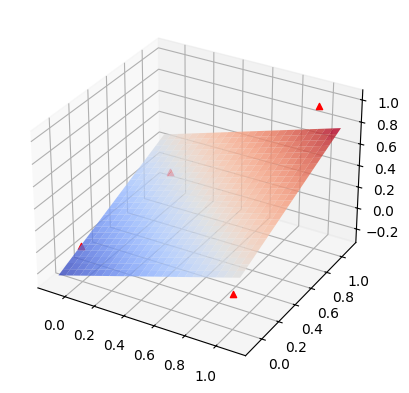

In [19]:
# plot AND gate
x1 = np.arange(-0.1, 1.1, 0.05)
x2 = np.arange(-0.1, 1.1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
y = 0.4210 * x1 + 0.4210 * x2 - 0.1563

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(0, 0, 0, marker='^', c='r')
ax.scatter(0, 1, 0, marker='^', c='r')
ax.scatter(1, 0, 0, marker='^', c='r')
ax.scatter(1, 1, 1, marker='^', c='r')
ax.plot_surface(x1, x2, y, cmap='coolwarm', alpha=0.8)

In [13]:
# OR gate

# initialize parameter
w_or = torch.zeros(2, requires_grad=True)
b_or = torch.zeros(1, requires_grad=True)

# hyperparameter
learning_rate = 0.01
optimizer = optim.SGD([w_or, b_or], lr=learning_rate)
loss_fn = nn.MSELoss()

epochs = 500
for epoch in range(1, epochs+1):
    hypothesis = X @ w_or + b_or
    cost = loss_fn(hypothesis.view(-1,1), y_or)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {cost}')
print('cost:', cost)
w_or, b_or

Epoch: 100, Loss: 0.07582453638315201
Epoch: 200, Loss: 0.06902501732110977
Epoch: 300, Loss: 0.06597878783941269
Epoch: 400, Loss: 0.06435517221689224
Epoch: 500, Loss: 0.06348934024572372
cost: tensor(0.0635, grad_fn=<MseLossBackward0>)


(tensor([0.4571, 0.4571], requires_grad=True),
 tensor([0.3009], requires_grad=True))

In [14]:
predict(X, w=w_or, b=b_or)

tensor([0.3009, 0.7580, 0.7580, 1.2151], grad_fn=<AddBackward0>)

In [15]:
torch.where(predict(X, w=w_or, b=b_or)>0.5, 1., 0.)

tensor([0., 1., 1., 1.])

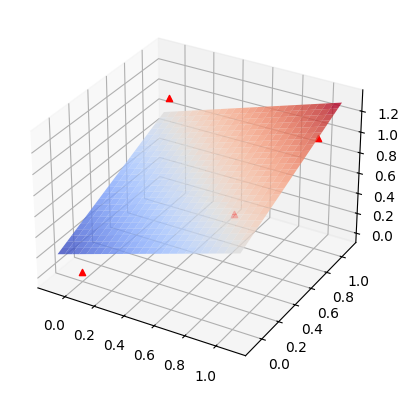

In [18]:
# plot OR gate
x1 = np.arange(-0.1, 1.1, 0.05)
x2 = np.arange(-0.1, 1.1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
y = 0.4571 * x1 + 0.4571 * x2 + 0.3009

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(0, 0, 0, marker='^', c='r')
ax.scatter(0, 1, 1, marker='^', c='r')
ax.scatter(1, 0, 1, marker='^', c='r')
ax.scatter(1, 1, 1, marker='^', c='r')
ax.plot_surface(x1, x2, y, cmap='coolwarm', alpha=0.8)